In [1]:
import sys
sys.path.append('..')
from mtDNAsim import *

/home/wangkun/mtDNA_simulation/notebook/../mtDNAsim/sim_utils.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns
from collections import Counter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
import phylovelo as pv

In [3]:
plt.rcParams['font.size'] = 12

In [4]:
# num_elements = 5
# system = Gillespie(
#     num_elements,
#     inits=[1, 0, 0, 0, 0],
#     max_cell_num=8000
# )

# p0 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 17))))
# p1 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 17))))
# p2 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 17))))
# p3 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 18))))
# p4 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 19))))
# d0 = lambda t: 1 - p0(t)
# d1 = lambda t: 1 - p1(t)
# d2 = lambda t: 1 - p2(t)
# d3 = lambda t: 1 - p3(t)

# system.add_reaction(p0, [1, 0, 0, 0, 0], [2, 0, 0, 0, 0], index=0) # 0 self renew
# system.add_reaction(p1, [0, 1, 0, 0, 0], [0, 2, 0, 0, 0], index=1) # 1 self renew
# system.add_reaction(p2, [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], index=2) # 2 self renew
# system.add_reaction(p3, [0, 0, 0, 1, 0], [0, 0, 0, 2, 0], index=3) # 3 self renew
# system.add_reaction(p4, [0, 0, 0, 0, 1], [0, 0, 0, 0, 2], index=4) # 4 self renew
# system.add_reaction(d0, [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], index=5) # 0 -> 1 differentiation
# system.add_reaction(d1, [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], index=6) # 1 -> 2 differentiation
# system.add_reaction(d2, [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], index=7) # 2 -> 3 differentiation
# system.add_reaction(d3, [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], index=8) # 3 -> 4 differentiation

# system.evolute(20000000)

In [5]:
# data_path = "../results/"
# tree_file_name = "tree_origin_linear.csv0"
# cell_num_file_name = "cell_num_linear.csv0"

# curr_cells = []
# t = np.array(system.generation_time)
# cell_num_traj = np.array(system.n)

# for i in system.curr_cells.values():
#     curr_cells += i
# while tree_file_name in os.listdir(data_path):
#     tree_file_name = tree_file_name[:-1] + str(int(tree_file_name[-1]) + 1)
#     cell_num_file_name = cell_num_file_name[:-1] + str(int(cell_num_file_name[-1]) + 1)

# np.savetxt(
#     data_path + cell_num_file_name,
#     np.hstack((t.reshape(-1, 1), cell_num_traj)),
#     fmt="%.5f",
# )

# sim_utils.wirte_lineage_info(
#     data_path + tree_file_name, system.anc_cells, curr_cells, system.t[-1]
# )


In [6]:
# reconstruct('./results/tree_origin_linear.csv0', output='./results/tree_origin_linear.nwk', num=1000, is_balance=True)

In [4]:
tree_file = '../results/tree_origin_linear.nwk'
phylo_tree, branch_colors = loadtree(tree_file)
sampled_cells = [i.name for i in phylo_tree.get_terminals()]
cell_names, cell_states, cell_generation = get_annotation('../results/tree_origin_linear.csv0')
cell_states = pd.DataFrame(data=cell_states, index=cell_names).loc[sampled_cells]
cell_generation = pd.DataFrame(data=cell_generation, index=cell_names).loc[sampled_cells].to_numpy()

In [5]:
sd = scData(
    phylo_tree=phylo_tree,
    cell_states=cell_states.to_numpy().T[0].astype('int'),
    cell_generation=cell_generation.T[0].astype('int'),
    cell_names=sampled_cells
)

In [6]:
ge, base_expr = sim_base_expr(sd.phylo_tree,
                                 cell_states,
                                 Ngene=2000,
                                 r_variant_gene=0.4,
                                 diff_map={0:[0],1:[0],2:[1],3:[2],4:[3]},
                                 forward_map={},
                                 mu0_loc=0,
                                 mu0_scale=1,
                                 drift_loc=0,
                                 drift_scale=0.3,
                                )

In [7]:
sd.count = get_count_from_base_expr(add_lineage_noise(sd.phylo_tree, base_expr), alpha=0.1)

In [8]:
sd.dimensionality_reduction()

/home/wangkun/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wangkun/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


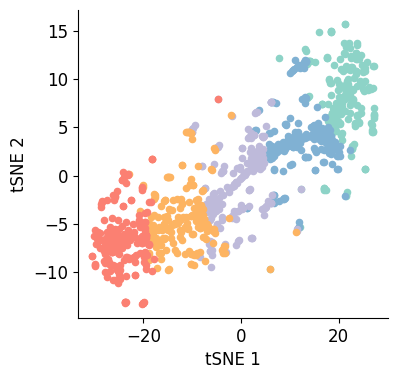

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
cmps = ['#8dd3c7','#80b1d3','#bebada','#fdb462','#fb8072']
for i in range(5):
    ax.scatter(sd.Xdr.iloc[sd.cell_states==i, 0], sd.Xdr.iloc[sd.cell_states==i, 1], c=cmps[i], s=20)
ax.set_xlabel('tSNE 1', )
ax.set_ylabel('tSNE 2', )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [19]:
tree_file = '../results/tree_origin_linear.nwk'
phylo_tree, branch_colors = loadtree(tree_file)

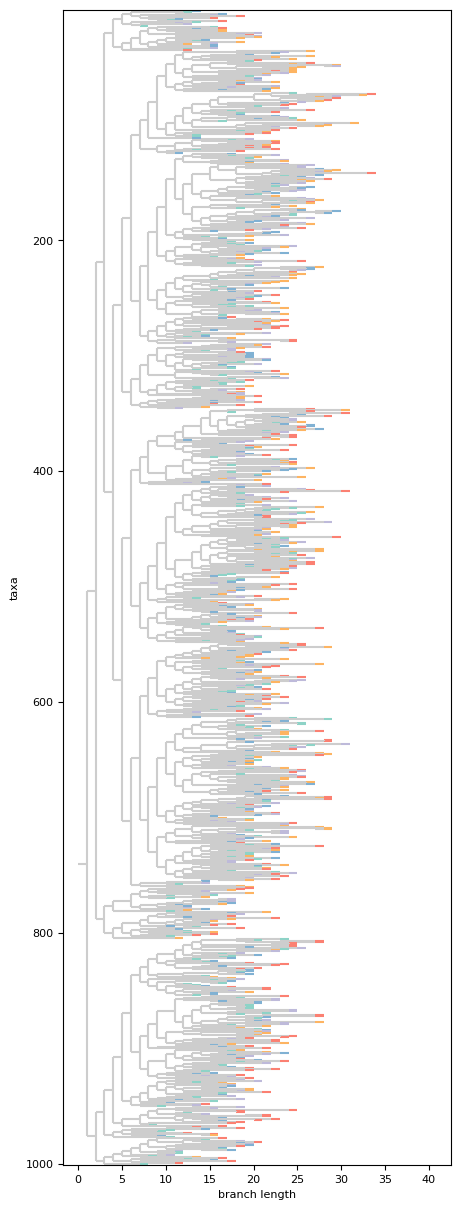

In [22]:
import phylovelo as pv
fig, ax = plt.subplots(figsize=(5,15))
ax = pv.plot_tree(phylo_tree, branch_colors, ax, stain="terminals", colortab=['#8dd3c7','#80b1d3','#bebada','#fdb462','#fb8072'])

In [4]:
import pickle
# pickle.dump(sd, open('../results/sd_linear.pkl', 'wb'))
sd = pickle.load(open('../results/sd_linear.pkl', 'rb'))

In [5]:
seqs = DNAmutation(sd.phylo_tree, mut_rate=0.1)

In [39]:
mt_muts, mutid = mtmutation(sd.phylo_tree, mut_rate=0, init_mut_rate=5, mt_copynumber=1.8)

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/6523 [00:00<?, ?it/s]

In [40]:
pre_existing_mut = set()
for i in mt_muts['<0_0>']:
    pre_existing_mut = pre_existing_mut.union(i)

In [41]:
n_mts = []
for i in sd.Xdr.index:
    n_mts.append(len(mt_muts[i]))

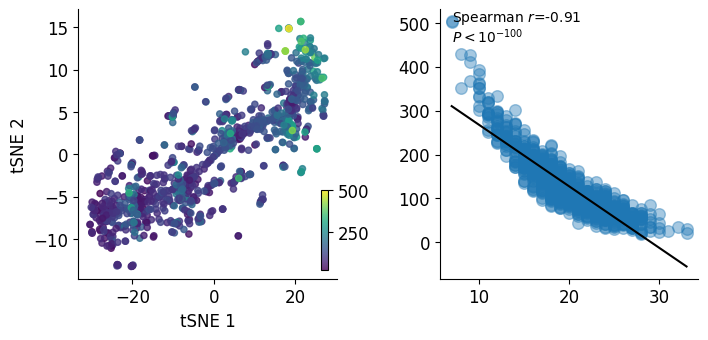

In [42]:
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))
cmps = ['#8dd3c7','#80b1d3','#bebada','#fdb462','#fb8072']
# for i in range(5):
scatter = ax[0].scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:, 1], c=n_mts, s=20, alpha=0.8)
ax[0].set_xlabel('tSNE 1', )
ax[0].set_ylabel('tSNE 2', )
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
cbaxes = inset_axes(ax[0], width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
pv.corr_plot(sd.cell_generation, n_mts, ax=ax[1], stats='spearman')
# plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
ax[1].set_xlabel('Cell generation')
ax[1].set_ylabel('Cell generation')

In [15]:
mf = mut_freq(mt_muts, mutid, sel_cells=[i.name for i in sd.phylo_tree.get_terminals()])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
# mf.to_csv('../results/mt_increasing_mut_freq.csv')

In [17]:
plt.rcParams['font.size'] = 8

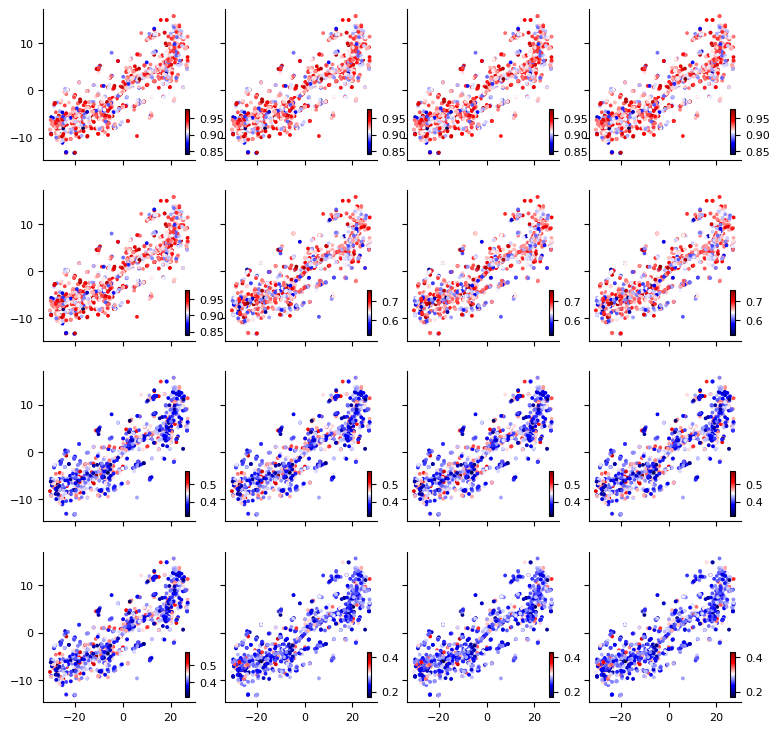

In [18]:
# show_mtmuts = np.random.choice(list(pre_existing_mut), 16, replace=False)
show_mtmuts = mf.sum().sort_values(ascending=False).index[:16]
fig, ax = plt.subplots(4, 4, figsize=(9, 9), sharex=True, sharey=True)
for ind, i in enumerate(show_mtmuts):
    scatter = ax[ind//4][ind%4].scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:, 1], c=mf.loc[sd.Xdr.index][i], cmap='seismic', s=3)
    # ax[i//4][i%4].set_xlabel('tSNE 1', )
    # ax[i//4][i%4].set_ylabel('tSNE 2', )
    ax[ind//4][ind%4].spines['right'].set_visible(False)
    ax[ind//4][ind%4].spines['top'].set_visible(False)
    cbaxes = inset_axes(ax[ind//4][ind%4], width="3%", height="30%", loc='lower right') 
    plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
# plt.tight_layout()

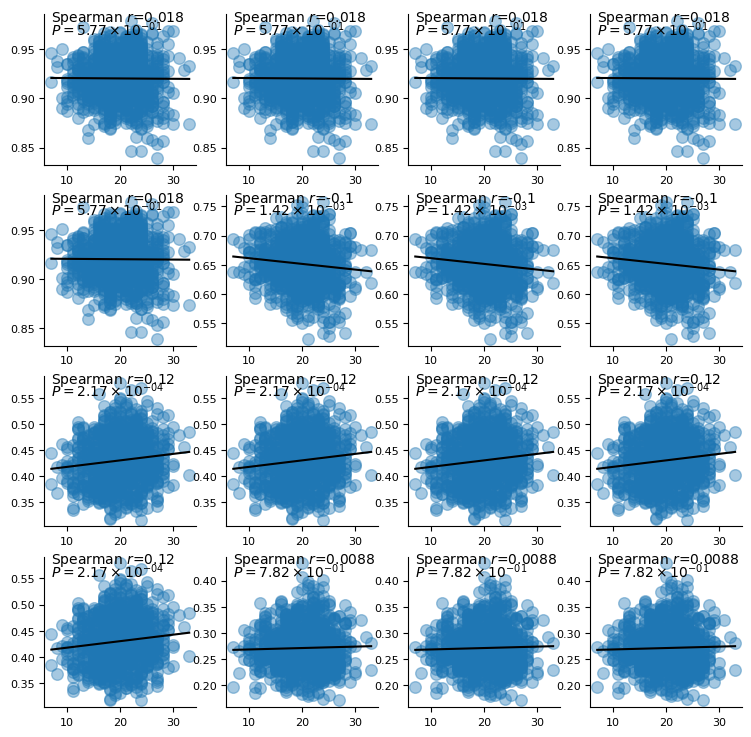

In [26]:
fig, ax = plt.subplots(4, 4, figsize=(9, 9))
for ind, i in enumerate(show_mtmuts):
    pv.corr_plot(sd.cell_generation, mf.loc[sd.Xdr.index][i], ax=ax[ind//4][ind%4], stats='spearman')
    # ax[ind//4][ind%4].scatter(sd.cell_generation, mf.loc[sd.Xdr.index][i], s=3)
    ax[ind//4][ind%4].spines['right'].set_visible(False)
    ax[ind//4][ind%4].spines['top'].set_visible(False)

# plt.tight_layout()

In [21]:
mf.sum().sort_values(ascending=False).index[:16]

Int64Index([0, 5, 7, 6, 1, 4, 2, 3, 16, 18, 17, 23, 22, 21, 19, 20], dtype='int64')

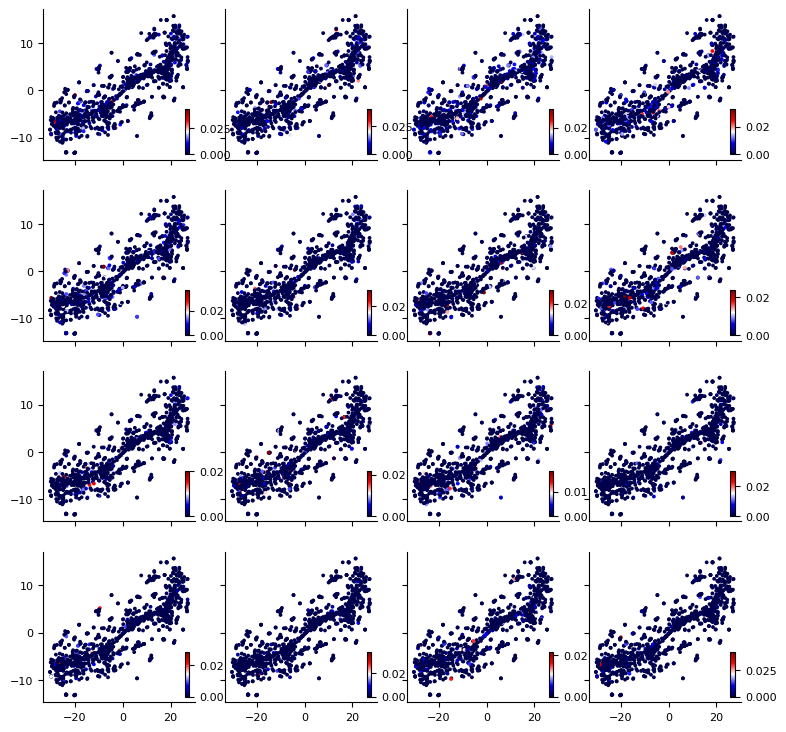

In [23]:
show_mtmuts = mf[list(set(mf.columns)-pre_existing_mut)].sum().sort_values(ascending=False).index[:16]
fig, ax = plt.subplots(4, 4, figsize=(9, 9), sharex=True, sharey=True)
for ind, i in enumerate(show_mtmuts):
    scatter = ax[ind//4][ind%4].scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:, 1], c=mf.loc[sd.Xdr.index][i], cmap='seismic', s=3)
    # ax[i//4][i%4].set_xlabel('tSNE 1', )
    # ax[i//4][i%4].set_ylabel('tSNE 2', )
    ax[ind//4][ind%4].spines['right'].set_visible(False)
    ax[ind//4][ind%4].spines['top'].set_visible(False)
    cbaxes = inset_axes(ax[ind//4][ind%4], width="3%", height="30%", loc='lower right') 
    plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
# plt.tight_layout()

In [23]:
np.max(mf[list(set(mf.columns)-pre_existing_mut)]).sort_values(ascending=False)

/home/wangkun/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


11112    0.039092
11124    0.038724
42950    0.038298
11108    0.038055
11156    0.037485
           ...   
31460    0.000782
31449    0.000782
31454    0.000782
31383    0.000782
31392    0.000782
Length: 34522, dtype: float64

In [24]:
sum(np.sum(mf[list(set(mf.columns)-pre_existing_mut)]>0.01)!=0)

748

In [25]:
mf[list(set(mf.columns)-pre_existing_mut)].shape

(1000, 34522)

In [26]:
sum(np.sum(mf[list(pre_existing_mut)]>0.01)!=0)

10305

In [27]:
len(pre_existing_mut)

10472

In [46]:
cnt[37]

501

In [42]:
from collections import Counter
cnt = Counter(sum([list(i) for i in mt_muts['<0_0>']], []))

In [32]:
plt.rcParams['font.size'] = 12

Text(0.5, 0, 'Mutation frequency')

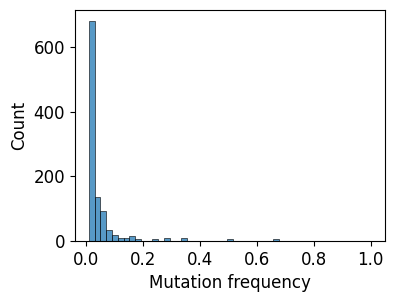

In [33]:
fig, ax = plt.subplots(figsize=(4,3))
sns.histplot(np.array(list(cnt.values()))/len(mt_muts['<0_0>']), bins=np.linspace(0.01 ,1, 50), ax=ax)
ax.set_xlabel('Mutation frequency')

In [34]:
cnt = Counter()
for i in tqdm(sd.phylo_tree.get_terminals()):
    cnt += Counter(sum([list(i) for i in mt_muts[i.name]], []))

  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 0, 'Mutation frequency')

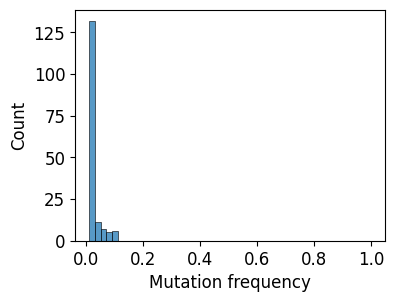

In [40]:
fig, ax = plt.subplots(figsize=(4,3))
sns.histplot(np.array(list(cnt.values()))/sum([len(mt_muts[i]) for i in mt_muts]), bins=np.linspace(0.01 ,1, 50), ax=ax)
ax.set_xlabel('Mutation frequency')